<a href="https://colab.research.google.com/github/yeahginny/Machine_learning/blob/main/KNN_upgrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 필요한 패키지 설치
!pip install mglearn
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset
df = pd.read_excel("/content/Raisin_Dataset.xlsx")

# 데이터 샘플 확인
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
# 독립변수와 종속변수 분리하여 생성
x = df.drop(['Area','Class'], axis='columns')
y = df[['Class']]

# 독립변수 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(x)

# 컬럼명 결합
x = pd.DataFrame(data=df_minmax, columns=x.columns)

# 학습셋, 테스트셋 분리 (6:4)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  540
test data 개수:  360


In [ ]:
# uniform은 이웃한 관측치와의 거리에 가중치를 주지 않는 옵션
# n_neighbors = 3을 주어서 이웃한 3개의 관측치를 기반으로 분류를 합니다.

In [ ]:
# 기본 K-nn 모델 생성 및 적용

classifier = KNeighborsClassifier(n_neighbors = 3,
                                  weights='uniform')
classifier.fit(x_train, y_train)

# K-nn 모델 정확도 출력
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.8925925925925926
0.8444444444444444


In [ ]:
# 거리 가중치를 적용하지 않는 모델에서 k이웃의 갯수를 1~30까지 늘려가면서 오분류율을
# 시각화 합니다.
# 이웃의 갯수가 5개가 되면서 오분류율이 15%대로 낮아지고, 12개가 될때 가장 낮은 것을 볼 수 있습니다.
# 그러나 너무 많은 이웃은 과적합을 유도할 수 있으므로 6개정도로 협의를 해도 좋을것 같습니다.
# 컴피티션의 경우에는 12개를 써야겠죠?

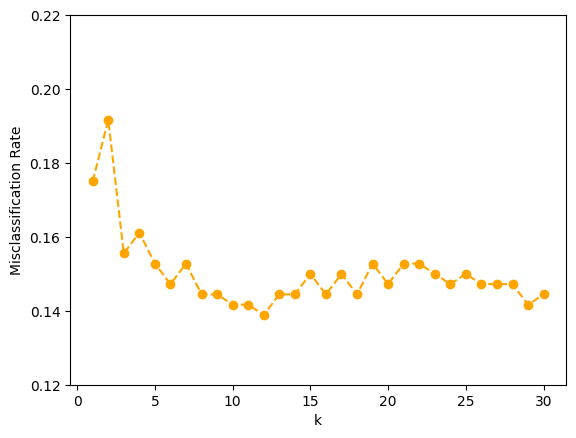

In [ ]:
# 이웃 k 수 1 ~ 30까지 엘보우차트 시각화 (거리 가중치 미적용)

# k 수 범위 지정
k_num = range(1,31)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    k_num_model_1.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_1.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.12, 0.22)
plt.show()

In [ ]:
# 거리 가중치를 적용한 모델은 어떻게 되는지에 대해서 살펴봅시다.
# 앞서 가중치를 미적용한 모델에 비해 오분류율이 감소한 것을 확인할 수 있고, 변동성도 줄어든것을 확인할 수 있어요.

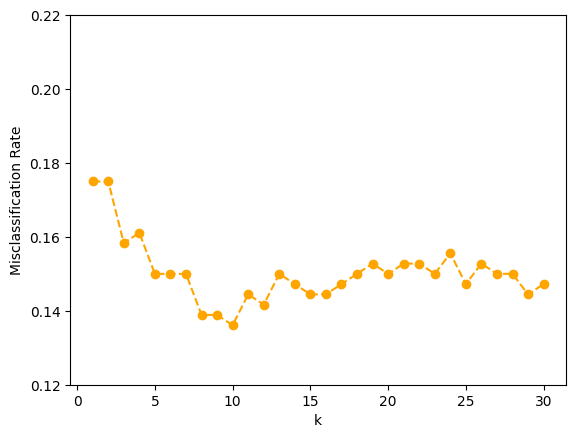

In [ ]:
# 이웃 k 수 1 ~ 30까지 엘보우차트 시각화 (거리 가중치 적용)

# k 수 범위 지정
k_num = range(1,31)

accuracies = []
for k in k_num:
  k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
  k_num_model_2.fit(x_train, y_train)
  accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.12, 0.22)
plt.show()

In [ ]:
# 오분류율은 계속적으로 낮아지지 않음을 볼 수 있습니다.

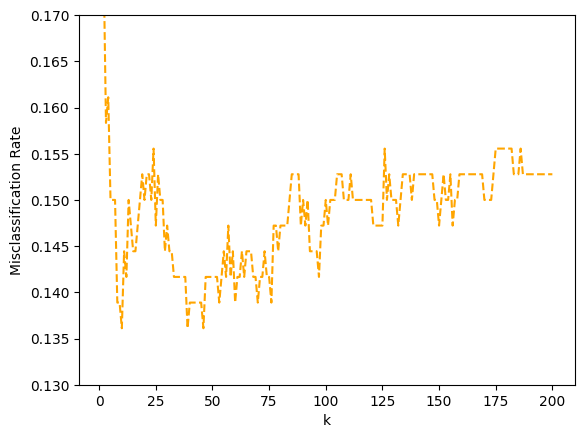

In [ ]:
# 이웃 k 수 1 ~ 200까지 엘보우차트 시각화 (거리 가중치 적용)

# k 수 범위 지정
k_num = range(1,201)

accuracies = []
for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
    k_num_model_2.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, '--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.13, 0.17)
plt.show()

In [ ]:
# PCA를 사용하면 여러변수가 가지고 있는 다차원 n차원을 2차원으로 줄여서 확인할 수 있습니다.
# 그 2개의 변수로 이웃수를 바꿔서 어떻게 결정경계선이 달라지는지 확인할 수 있습니다.
# 5개와 20개는 크게 차이가 나는것처럼 보이지 않습니다.


In [ ]:
# 시각화를 위한 차원 축소

# 주성분 개수 설정(2개 설정)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_test)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns = ['C1','C2'])

df_pca.head()

,C1,C2
0,0.015601,-0.196276
1,-0.057779,-0.007590
2,0.131111,0.171807
3,0.207903,-0.073944
4,-0.175377,-0.140094


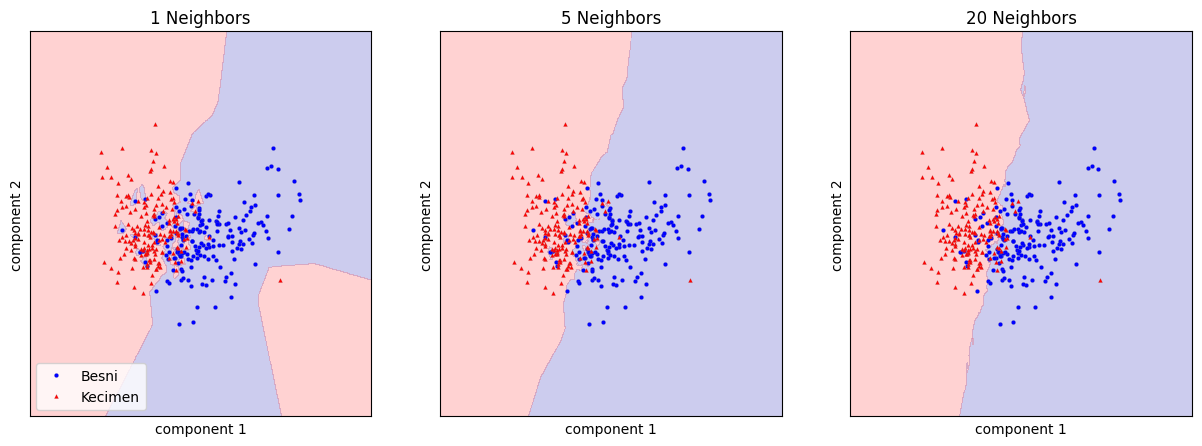

In [ ]:
# 결정 경계선(decision boundary) 시각화 확인

# 독립변수, 종속변수 전처리
df_vsl_x = df_pca.to_numpy()
df_vsl_y = y_test['Class'].to_numpy()

# 그래프 설정
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 이웃 수 1, 5, 20에 따른 결정경계 시각화
for n_neighbors, ax in zip([1, 5, 20], axes):
    k_num_model_eg = KNeighborsClassifier(
        n_neighbors=n_neighbors).fit(df_vsl_x, df_vsl_y)
    mglearn.plots.plot_2d_separator(k_num_model_eg, df_vsl_x,
                                    fill=True, eps=0.5, ax=ax, alpha=.2)
    mglearn.discrete_scatter(df_vsl_x[:, 0], df_vsl_x[:, 1],
                             df_vsl_y, markeredgewidth=0.1,
                             c=['b','r'], s=3, ax=ax)
    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.set_title("{} Neighbors".format(n_neighbors))
axes[0].legend(loc=3)